# **Automatic Classification of 31 Fish Species Using Convolutional Neural Network (CNN)**

### **Import Library**

In [1]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
import kagglehub

### **Bagian 1: Persiapkan Path Dataset**

In [2]:
# ==============================================================================
# Bagian 1: Persiapkan Path Dataset
# ==============================================================================
print("Bagian 1: Mempersiapkan path dataset...")

# 'download_path' adalah path ke folder dataset yang sudah diekstrak.
download_path = kagglehub.dataset_download("markdaniellampa/fish-dataset")
print(f"Dataset sudah diunduh dan diekstrak di: {download_path}")

# **Path yang benar dan langsung ke folder train dan test yang sudah ada**
train_dir = os.path.join(download_path, 'FishImgDataset', 'train')
test_dir = os.path.join(download_path, 'FishImgDataset', 'test')

# Memeriksa apakah direktori ada
if not os.path.exists(train_dir) or not os.path.exists(test_dir):
    raise FileNotFoundError("Direktori 'train' atau 'test' tidak ditemukan di dalam dataset.")

print(f"Direktori Training ditemukan di: {train_dir}")
print(f"Direktori Testing ditemukan di: {test_dir}")

Bagian 1: Mempersiapkan path dataset...


100%|██████████| 1.58G/1.58G [00:17<00:00, 96.6MB/s]

Extracting files...


Dataset sudah diunduh dan diekstrak di: /root/.cache/kagglehub/datasets/markdaniellampa/fish-dataset/versions/1
Direktori Training ditemukan di: /root/.cache/kagglehub/datasets/markdaniellampa/fish-dataset/versions/1/FishImgDataset/train
Direktori Testing ditemukan di: /root/.cache/kagglehub/datasets/markdaniellampa/fish-dataset/versions/1/FishImgDataset/test


In [3]:
# ==============================================================================
# Menampilkan Daftar Spesies dari Folder Train
# ==============================================================================
import os

def list_species_from_train_folder(train_folder_path):
    """
    Menampilkan daftar nama spesies ikan dari folder training dalam 3 kolom.
    """
    if not os.path.exists(train_folder_path):
        raise FileNotFoundError(f"Folder train tidak ditemukan di: {train_folder_path}")

    # Ambil nama folder (spesies) di dalam folder train
    species = sorted([
        folder_name for folder_name in os.listdir(train_folder_path)
        if os.path.isdir(os.path.join(train_folder_path, folder_name))
    ])

    print(f"Spesies ikan yang ditemukan di folder '{train_folder_path}':\n")

    # Konfigurasi tampilan kolom
    column_limit = 11
    column1 = species[:column_limit]
    column2 = species[column_limit:2*column_limit]
    column3 = species[2*column_limit:]

    max_len = max(len(column1), len(column2), len(column3))

    for i in range(max_len):
        line = ""
        if i < len(column1):
            line += f"{i+1:2d}. {column1[i]:<20}"
        else:
            line += " " * 24
        if i < len(column2):
            line += f"{i+column_limit+1:2d}. {column2[i]:<20}"
        else:
            line += " " * 24
        if i < len(column3):
            line += f"{i+2*column_limit+1:2d}. {column3[i]:<20}"
        print(line)

# Panggil fungsi dengan path dari Bagian 1
list_species_from_train_folder(train_dir)

Spesies ikan yang ditemukan di folder '/root/.cache/kagglehub/datasets/markdaniellampa/fish-dataset/versions/1/FishImgDataset/train':

 1. Bangus              12. Grass Carp          23. Pangasius           
 2. Big Head Carp       13. Green Spotted Puffer24. Perch               
 3. Black Spotted Barb  14. Indian Carp         25. Scat Fish           
 4. Catfish             15. Indo-Pacific Tarpon 26. Silver Barb         
 5. Climbing Perch      16. Jaguar Gapote       27. Silver Carp         
 6. Fourfinger Threadfin17. Janitor Fish        28. Silver Perch        
 7. Freshwater Eel      18. Knifefish           29. Snakehead           
 8. Glass Perchlet      19. Long-Snouted Pipefish30. Tenpounder          
 9. Goby                20. Mosquito Fish       31. Tilapia             
10. Gold Fish           21. Mudfish             
11. Gourami             22. Mullet              


### **Bagian 2: Menambahkan Informasi Habitat**


Bagian 2: Analisis Habitat


<ipython-input-4-524220138>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=habitats, palette=['skyblue', 'salmon'])


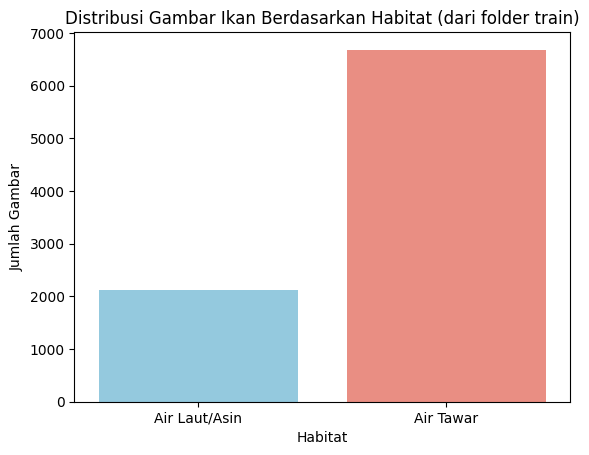

In [4]:
# ==============================================================================
# Bagian 2: Menambahkan Informasi Habitat
# ==============================================================================
print("\nBagian 2: Analisis Habitat")

habitat_dict = {
    'Jaguar Gapote': 'Air Tawar', 'Perch': 'Air Tawar', 'Mullet': 'Air Laut/Asin',
    'Indo-Pacific Tarpon': 'Air Laut/Asin', 'Grass Carp': 'Air Tawar', 'Long-Snouted Pipefish': 'Air Laut/Asin',
    'Glass Perchlet': 'Air Tawar', 'Goby': 'Air Laut/Asin', 'Tilapia': 'Air Tawar',
    'Bangus': 'Air Laut/Asin', 'Green Spotted Puffer': 'Air Laut/Asin', 'Freshwater Eel': 'Air Tawar',
    'Big Head Carp': 'Air Tawar', 'Silver Carp': 'Air Tawar', 'Scat Fish': 'Air Laut/Asin',
    'Black Spotted Barb': 'Air Tawar', 'Climbing Perch': 'Air Tawar', 'Mosquito Fish': 'Air Tawar',
    'Janitor Fish': 'Air Tawar', 'Pangasius': 'Air Tawar', 'Gold Fish': 'Air Tawar',
    'Gourami': 'Air Tawar', 'Indian Carp': 'Air Tawar', 'Mudfish': 'Air Tawar',
    'Knifefish': 'Air Tawar', 'Silver Perch': 'Air Tawar', 'Tenpounder': 'Air Laut/Asin',
    'Catfish': 'Air Tawar', 'Snakehead': 'Air Tawar', 'Fourfinger Threadfin': 'Air Laut/Asin',
    'Carp': 'Air Tawar', 'Silver Barb': 'Air Tawar'
}


# Membuat DataFrame hanya untuk visualisasi habitat
filepaths = []
habitats = []
for fish_class in os.listdir(train_dir):
    class_path = os.path.join(train_dir, fish_class)
    if os.path.isdir(class_path):
        habitat = habitat_dict.get(fish_class, 'Tidak Diketahui')
        # Menambahkan habitat sebanyak jumlah file di kelas tersebut
        num_files = len(os.listdir(class_path))
        habitats.extend([habitat] * num_files)

# Visualisasi
sns.countplot(x=habitats, palette=['skyblue', 'salmon'])
plt.title('Distribusi Gambar Ikan Berdasarkan Habitat (dari folder train)')
plt.xlabel('Habitat')
plt.ylabel('Jumlah Gambar')
plt.show()

### **Bagian 3: Menyiapkan Generator Data**

In [5]:
# ==============================================================================
# Bagian 3: Menyiapkan Generator Data
# ==============================================================================
print("\nBagian 3: Menyiapkan generator data...")

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

num_classes = len(train_generator.class_indices)
print(f"Total kelas yang terdeteksi: {num_classes}")


Bagian 3: Menyiapkan generator data...
Found 8791 images belonging to 31 classes.
Found 1760 images belonging to 31 classes.
Total kelas yang terdeteksi: 31


### **Bagian 4 & 5: Transfer Learning dengan MobileNetV2**

In [6]:
# ==============================================================================
# Bagian 4 & 5: Transfer Learning dengan MobileNetV2
# ==============================================================================
print("\nBagian 4 & 5: Transfer Learning dengan MobileNetV2...")

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Load base model MobileNetV2 tanpa top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

# Tambahkan top layer kita
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks tambahan
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1)

model.summary()

# Latih model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Setelah training awal, aktifkan fine-tuning pada beberapa layer akhir
print("\nFine-tuning beberapa layer akhir MobileNetV2...")
base_model.trainable = True

# Freeze sebagian besar layer, kecuali 30 terakhir
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Kompilasi ulang dengan learning rate lebih kecil
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune
history_finetune = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[early_stopping, reduce_lr]
)


Bagian 4 & 5: Transfer Learning dengan MobileNetV2...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,593,887 (9.89 MB)

 Trainable params: 335,903 (1.28 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
275/275 ━━━━━━━━━━━━━━━━━━━━ 160s 540ms/step - accuracy: 0.3388 - loss: 2.5140 - val_accuracy: 0.7233 - val_loss: 0.9767 - learning_rate: 0.0010
Epoch 2/15
275/275 ━━━━━━━━━━━━━━━━━━━━ 138s 499ms/step - accuracy: 0.6268 - loss: 1.2834 - val_accuracy: 0.8028 - val_loss: 0.7321 - learning_rate: 0.0010
Epoch 3/15
275/275 ━━━━━━━━━━━━━━━━━━━━ 139s 505ms/step - accuracy: 0.6860 - loss: 1.0743 - val_accuracy: 0.8193 - val_loss: 0.6336 - learning_rate: 0.0010
Epoch 4/15
275/275 ━━━━━━━━━━━━━━━━━━━━ 141s 512ms/step - accuracy: 0.7251 - loss: 0.9248 - val_accuracy: 0.8426 - val_loss: 0.5530 - learning_rate: 0.0010
Epoch 5/15
275/275 ━━━━━━━━━━━━━━━━━━━━ 141s 511ms/step - accuracy: 0.7384 - loss: 0.8922 - val_accuracy: 0.8369 - val_loss: 0.5346 - learning_rate: 0.0010
Epoch 6/15
275/275 ━━━━━━━━━━━━━━━━━━━━ 139s 506ms/step - accuracy: 0.7492 - loss: 0.8258 - val_accuracy: 0.8568 - val_loss: 0.4846 - learning_rate: 0.0010
Epoch 7/15
275/275 ━━━━━━━━━━━━━━━━━━━━ 140s 509ms/step - accura

### **Menyimpan model**

In [7]:
model.save("model_ikan.h5")  # Menyimpan model
import json
with open("class_indices.json", "w") as f:
    json.dump(train_generator.class_indices, f)  # Simpan label index

### **Bagian Baru: Prediksi Gambar Baru dan Tampilkan Confident Level**

In [8]:
# ==============================================================================
# Bagian Baru: Prediksi Gambar Baru dan Tampilkan Confident Level
# ==============================================================================
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import json

# Muat kembali model dan class index
model = load_model("model_ikan.h5")
with open("class_indices.json", "r") as f:
    class_indices = json.load(f)

# Balik dictionary index -> label
index_to_class = {v: k for k, v in class_indices.items()}

# Fungsi prediksi dengan confidence score
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    confidence = np.max(predictions)  # Nilai tertinggi (confidence score)
    class_index = np.argmax(predictions)
    predicted_class = index_to_class[class_index]

    print(f"Prediksi: {predicted_class}")
    print(f"Confidence Score: {confidence:.2f} ({confidence*100:.2f}%)")

    return predicted_class, confidence

55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step

Classification Report:
                       precision    recall  f1-score   support

               Bangus       0.79      0.91      0.85        34
        Big Head Carp       0.93      0.88      0.90        43
   Black Spotted Barb       0.94      0.75      0.83        40
              Catfish       0.83      0.92      0.87        62
       Climbing Perch       0.75      0.70      0.72        30
 Fourfinger Threadfin       0.85      0.92      0.89        38
       Freshwater Eel       0.96      0.95      0.95        55
       Glass Perchlet       0.91      0.95      0.93        77
                 Goby       0.95      0.96      0.96       124
            Gold Fish       0.98      0.98      0.98        41
              Gourami       0.97      0.95      0.96        63
           Grass Carp       0.97      0.97      0.97       238
 Green Spotted Puffer       1.00      1.00      1.00        22
          Indian Carp       0.98      0.98      0.9

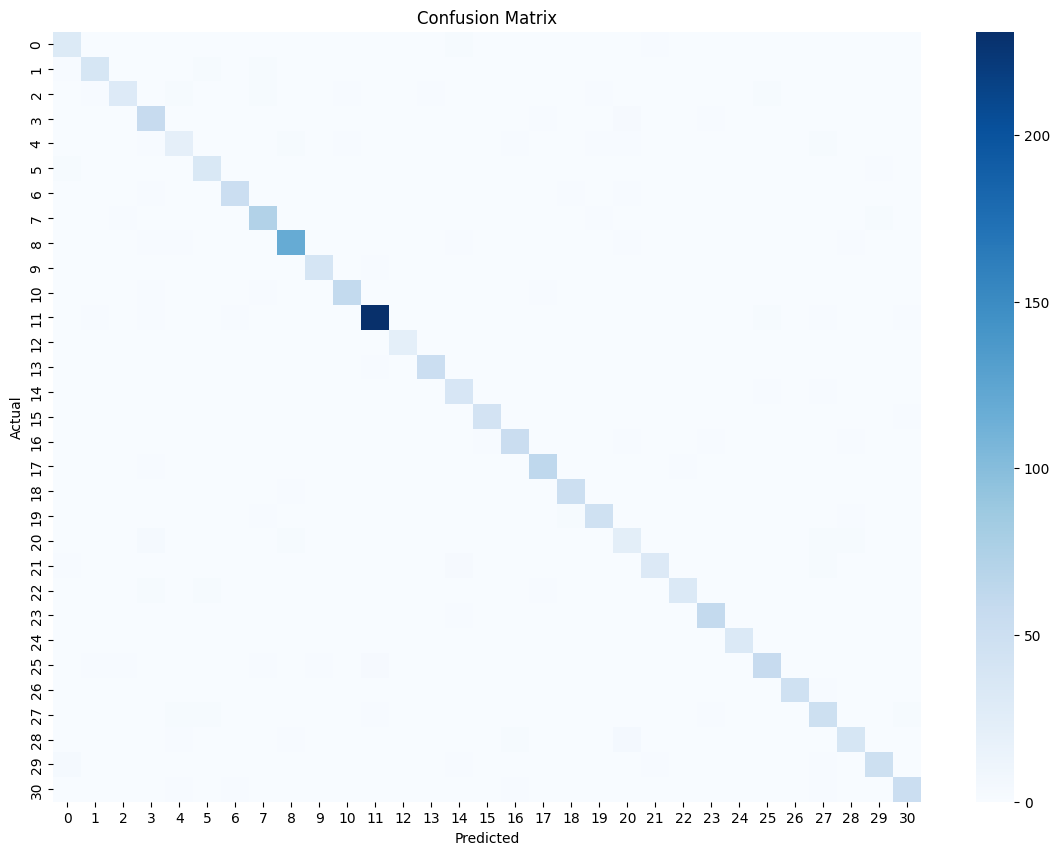

In [9]:
# ==============================================================================
# Bagian Baru: Mengevaluasi Performa Model Klasifikasi
# ==============================================================================
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Prediksi untuk test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Label nama kelas
labels = list(train_generator.class_indices.keys())

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### **Bagian 6: Evaluasi dan Fungsi Prediksi**

In [10]:
# ==============================================================================
# Bagian 6: Evaluasi dan Fungsi Prediksi
# ==============================================================================
print("\nBagian 6: Mengevaluasi dan menyiapkan fungsi prediksi...")
loss, accuracy = model.evaluate(test_generator)
print(f"\nAkurasi pada data test: {accuracy * 100:.2f}%")

class_labels = {v: k for k, v in train_generator.class_indices.items()}

def predict_and_display_habitat(image_path, model, class_labels_map, habitat_info_dict):
    try:
        img = image.load_img(image_path, target_size=IMG_SIZE)
        img_array = image.img_to_array(img)
        img_array_expanded = np.expand_dims(img_array, axis=0)
        img_array_processed = img_array_expanded / 255.0

        # Membuat prediksi
        prediction = model.predict(img_array_processed)

        # Mendapatkan confidence score (nilai probabilitas tertinggi)
        confidence = np.max(prediction)

        # Mendapatkan kelas/spesies yang diprediksi
        predicted_index = np.argmax(prediction)
        predicted_class = class_labels_map[predicted_index]

        # Mendapatkan habitat
        habitat = habitat_info_dict.get(predicted_class, 'Habitat tidak diketahui')

        # Menampilkan gambar dan hasil
        plt.imshow(img)
        plt.axis('off')
        # Menambahkan confidence score pada judul plot
        plt.title(f"Prediksi: {predicted_class}\nConfidence: {confidence:.2%}")
        plt.show()

        # Menampilkan hasil teks
        print("--- Hasil Prediksi ---")
        print(f"✅ Spesies Ikan: {predicted_class}")
        # Menampilkan confidence score dalam format persentase
        print(f"🎯 Tingkat Keyakinan (Confidence): {confidence:.2%}")
        print(f"🌊 Habitat: {habitat}")

    except FileNotFoundError:
        print(f"❌ Error: File tidak ditemukan di '{image_path}'.")
    except Exception as e:
        print(f"Terjadi error: {e}")


Bagian 6: Mengevaluasi dan menyiapkan fungsi prediksi...
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 172ms/step - accuracy: 0.9163 - loss: 0.2672

Akurasi pada data test: 92.56%


### **Bagian 7: Contoh Penggunaan**


Bagian 7: Menguji fungsi prediksi...
Menggunakan gambar contoh: /root/.cache/kagglehub/datasets/markdaniellampa/fish-dataset/versions/1/FishImgDataset/test/Indian Carp/Catla_2_jpg.rf.f7ab40aea15b16f83e938dc692b236fb.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


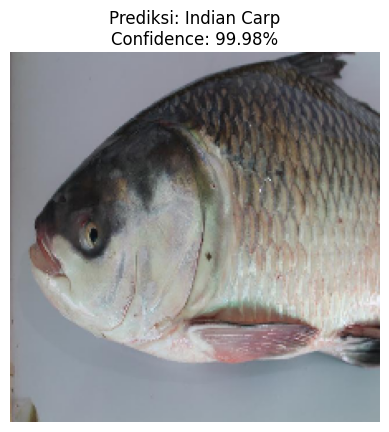

--- Hasil Prediksi ---
✅ Spesies Ikan: Indian Carp
🎯 Tingkat Keyakinan (Confidence): 99.98%
🌊 Habitat: Air Tawar


In [11]:
# ==============================================================================
# Bagian 7: Contoh Penggunaan
# ==============================================================================
print("\nBagian 7: Menguji fungsi prediksi...")
try:
    example_class = os.listdir(test_dir)[11]
    # Mengambil gambar dari dalam folder kelas
    class_folder_path = os.path.join(test_dir, example_class)
    if os.path.isdir(class_folder_path):
        example_image = os.listdir(class_folder_path)[2]
        path_gambar_untuk_diuji = os.path.join(class_folder_path, example_image)
        print(f"Menggunakan gambar contoh: {path_gambar_untuk_diuji}")
        predict_and_display_habitat(path_gambar_untuk_diuji, model, class_labels, habitat_dict)
except (IndexError, FileNotFoundError):
    print("Tidak dapat menemukan gambar contoh di direktori test.")
except Exception as e:
    print(f"Gagal menjalankan contoh prediksi: {e}")